<a href="https://colab.research.google.com/github/MinakshiNannore/Transport-Demand-Prediction/blob/main/ML_Regression_Transport_Demand_Prediction_By_Minakshi_Nannore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name** - Transport Demand Prediction





##### **Project Type -**      Regression
##### **Contribution-**       Individual
##### **Name -**              Minakshi Nannore

# **Project Summary -**

**Data Preprocessing** : 

1. Getting the dataset.
2. Importing important libraries.
3. Importing dataset.
4. Check duplicate Data.
5. Check Missing Data.
6. Data wrangling.

**Exploratory data analysis(EDA) :** 

1. Firstly Checked which payment_method is mostly used by people ?

2. Checked from where mostly transport are originates ?

3. Checked which car type is mostly used for transport ?

4. Checked maximum capacity of different car_type.

5. Checked number of tickets booked for any individual ride.

6. Checked maximum number of tickets sell for which route.

7. Checked average number of tickets sell for different car_type with an individual ride.

**Feature Engineering & Data Pre-processing :**

1. Feature Manipulation & Selection.
2. Categorical Encoding.
3. Data Transformation.
4. Data Scaling.
5. Dimensionality Reduction.
6. Data Spliting.

**Used Machine learning algorithms :**

1. Random Forest Regression.

2. Gradient Boost Regression.

3. XG Boost Regression.


# **GitHub Link -**

https://github.com/MinakshiNannore/Transport-Demand-Prediction

# **Problem Statement**


**Build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.**
##### The towns from which these routes originate are:
* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

**The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.**

The three stops that all these routes make in Nairobi (in order) are:
* Kawangware: the first stop in the outskirts of Nairobi
* Westlands
* Afya Centre: the main bus terminal where most passengers disembark

**Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.**


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import our dataset here
url='https://drive.google.com/file/d/1gM89f_6sRzFbWydniA65pYE63zvCJf55/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)


### Dataset First View

In [ ]:
# Dataset First Look - let's look top 5 entries
df.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(51645, 10)

### Dataset Information

In [ ]:
# Dataset Info - To get information of our data including column, null value, datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
(df.duplicated(subset=None, keep='first')).value_counts()

False    51645
dtype: int64

There is no duplicate value in our dataset

#### Missing Values/Null Values

In [ ]:
# To check null values in our data
df.isnull().values.any()

False

There is no Null value in our dataset

### What did you know about your dataset?

Our dataset containing 51645 records across 10 features has been given with information of tickets purchased from Mobiticket for the 14 routes from 'up country' into Nairobi between 17 October 2017 and 20 April 2018. Dataset doesn't contains any duplicate or Null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include = 'object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


### Variables Description 

Variables description:
#####**ride_id:**  unique ID of a vehicle on a specific route on a specific day and time.
#####**seat_number:** seat assigned to ticket
#####**payment_method:** method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
#####**payment_receipt:** unique id number for ticket purchased from Mobiticket
#####**travel_date:** date of ride departure. (MM/DD/YYYY)
#####**travel_time:** scheduled departure time of ride. Rides generally depart on time. (hh:mm)
#####**travel_from:** town from which ride originated
#####**travel_to:** destination of ride. All rides are to Nairobi.
#####**car_type:** vehicle type (shuttle or bus)
#####**max_capacity:** number of seats on the vehicle

### Check Unique Values for each variable.

In [ ]:
# Check unique values for each variable
df_variables = list(df.columns)

for m in df_variables:
  print(F"The unique values of {m} are {df[m].unique()}" + "\n")

The unique values of ride_id are [ 1442  5437  5710 ... 13825 13826 14304]

The unique values of seat_number are ['15A' '14A' '8B' '19A' '11A' '18B' '25' '21B' '22A' '17B' '1X' '3A' '1B'
 '1' '4A' '18A' '23A' '5' '16B' '8' '15B' '10' '3' '9' '7' '6' '4' '2'
 '20A' '9A' '22B' '23B' '24A' '2B' '13B' '24B' '14B' '20B' '19B' '10A'
 '17A' '2A' '7B' '6B' '5B' '3B' '4B' '1A' '5A' '6A' '21A' '13A' '8A' '9B'
 '12B' '10B' '7A' '16A' '12A' '11B' '14']

The unique values of payment_method are ['Mpesa' 'Cash']

The unique values of payment_receipt are ['UZUEHCBUSO' 'TIHLBUSGTE' 'EQX8Q5G19O' ... 'LVN64LZDNN' 'REYBSKTYWN'
 'AQN7FBUSGP']

The unique values of travel_date are ['17-10-17' '19-11-17' '26-11-17' '27-11-17' '20-04-18' '19-04-18'
 '18-04-18' '17-04-18' '16-04-18' '15-04-18' '14-04-18' '13-04-18'
 '12-04-18' '11-04-18' '28-11-17' '10-04-18' '09-04-18' '08-04-18'
 '07-04-18' '06-04-18' '05-04-18' '04-04-18' '03-04-18' '02-04-18'
 '01-04-18' '31-03-18' '30-03-18' '29-03-18' '28-03-18' '27-03-1

## 3. ***Data Wrangling***

##### Data Wrangling is the process to transform the data into more usable format

In [ ]:
# Creating a copy of our dataset.
df1 = df.copy()

####**Finding the target variable**

Since we are not given the target variable so we need to find target variable first.

The basic idea behind finding the target variable is the 'total number of tickets' allocated with unique ride_id.

In [ ]:
# Calculate the Target varible on the basis of unique ride id
total_tickets = df1.groupby(['ride_id']).seat_number.count().rename('number_of_ticket').reset_index()
total_tickets

,ride_id,number_of_ticket
0,1442,1
1,5437,1
2,5710,1
3,5777,5
4,5778,31
...,...,...
6244,20113,9
6245,20114,4
6246,20115,5
6247,20116,1


####**we get our target variable now, so drop the ride_id with repeated values.**

In [ ]:
# drop the duplicate value rows with the repeating ride_id
df1.drop_duplicates('ride_id', inplace = True)


####**Merging the target variable column to our dataset.**

In [ ]:
# Merging the calculated target variable column to the dataset based on the ride_id
df1 = df1.merge(total_tickets, how= 'left', on='ride_id')
df1

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_ticket
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
...,...,...,...,...,...,...,...,...,...,...,...
6244,13812,2B,Mpesa,FSAA2XB4WX,20-04-18,23:10,Ndhiwa,Nairobi,Bus,49,11
6245,13813,14B,Mpesa,TSOPCEGOKH,20-04-18,7:05,Ndhiwa,Nairobi,Bus,49,11
6246,13825,24A,Mpesa,B3R9XWCV9O,20-04-18,7:09,Rongo,Nairobi,Bus,49,1
6247,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49,1


### What all manipulations have you done and insights you found?

our dataset doesn't contains any Null or duplicate values.Since we are not given the target variable, here we found our target variable on the basis of 'total number of tickets' allocated with unique ride_id.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###**Univariate Analysis :-**

#### Chart - 1

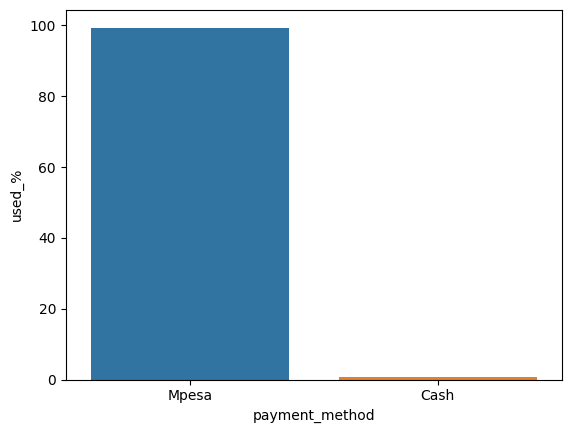

In [ ]:
# Chart-1  visualization code to see percentage of payment_method used.
grp_by_payment_method = df1.groupby('payment_method')
df2 = pd.DataFrame(grp_by_payment_method.size()/(df1.shape[0])*100).reset_index().rename(columns = {0:'used_%'}).sort_values('used_%', ascending = False)
sns.barplot(x = df2['payment_method'], y  = df2['used_%'])
plt.show()

##### 1. Why did you pick the specific chart?

To see which payment_method is mostly used by people.

##### 2. What is/are the insight(s) found from the chart?

Here we see 99% used payment_method is Mpesa, only 1% people use Cash payment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight will help creating a positive business impact.

#### Chart - 2

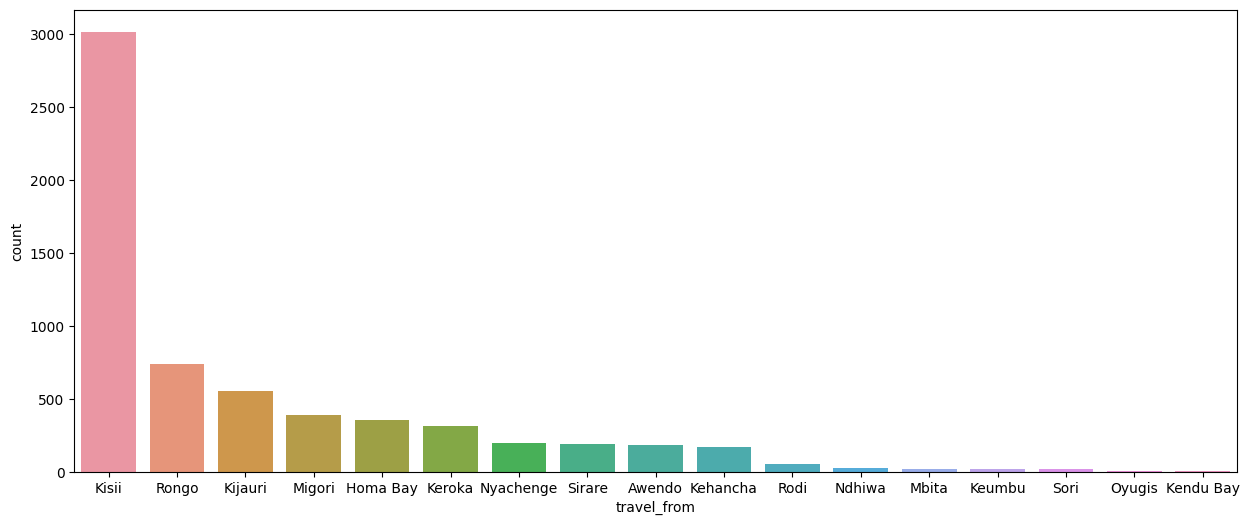

In [ ]:
# Chart-2  visualization code to see from where mostly transport are originates.
grp_by_travel_from = df1.groupby('travel_from')
df2 = pd.DataFrame(grp_by_travel_from.size()).reset_index().rename(columns = {0:'count'}).sort_values('count', ascending = False)
plt.figure(figsize = (15,6))
sns.barplot(x = df2['travel_from'], y  = df2['count'])
plt.show()

##### 1. Why did you pick the specific chart?

To check from where mostly transport are originates.

##### 2. What is/are the insight(s) found from the chart?

Mostly transports are originate from kisii town.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight will help creating a positive business impact.

#### Chart - 3

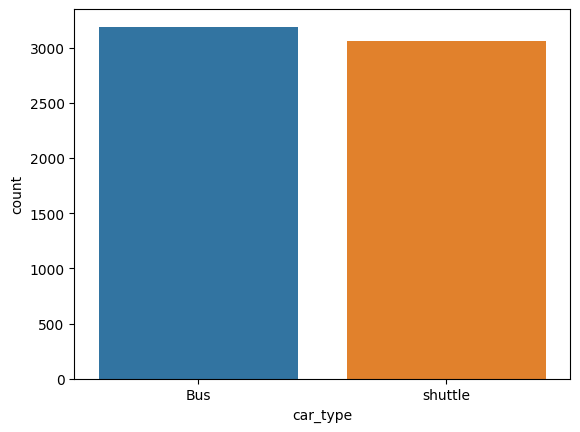

In [ ]:
# Chart-3  visualization code to see which car_type mostly used.
grp_by_car_type = df1.groupby('car_type')
df2 = pd.DataFrame(grp_by_car_type.size()).reset_index().rename(columns = {0:'count'}).sort_values('count', ascending = False)
sns.barplot(x = df2['car_type'], y  = df2['count'])
plt.show()

##### 1. Why did you pick the specific chart?

To check which car type is mostly used for transport.

##### 2. What is/are the insight(s) found from the chart?

Both Bus and shuttle are mostly used, but Bus_type used is slightly higher than shuttle_type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight will help creating a positive business impact.

#### Chart - 4

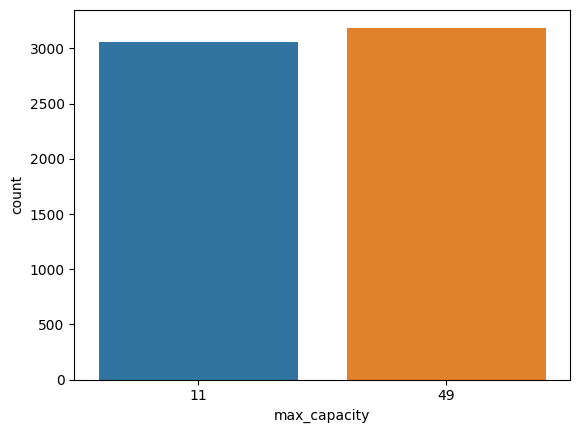

In [ ]:
# Chart-5  visualization code to plot max_capacity.
grp_by_max_capacity= df1.groupby('max_capacity')
df2 = pd.DataFrame(grp_by_max_capacity.size()).reset_index().rename(columns = {0:'count'})
sns.barplot(x = df2['max_capacity'], y  = df2['count'])
plt.show()

##### 1. Why did you pick the specific chart?

To plot max_capacity of car_type.

##### 2. What is/are the insight(s) found from the chart?

Here we plot the max_capacity. From our dataset we knew that maximum capacity of Bus is '49' and maximum capacity of Shuttle is '11'.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight will help creating a positive business impact.

#### Chart - 5

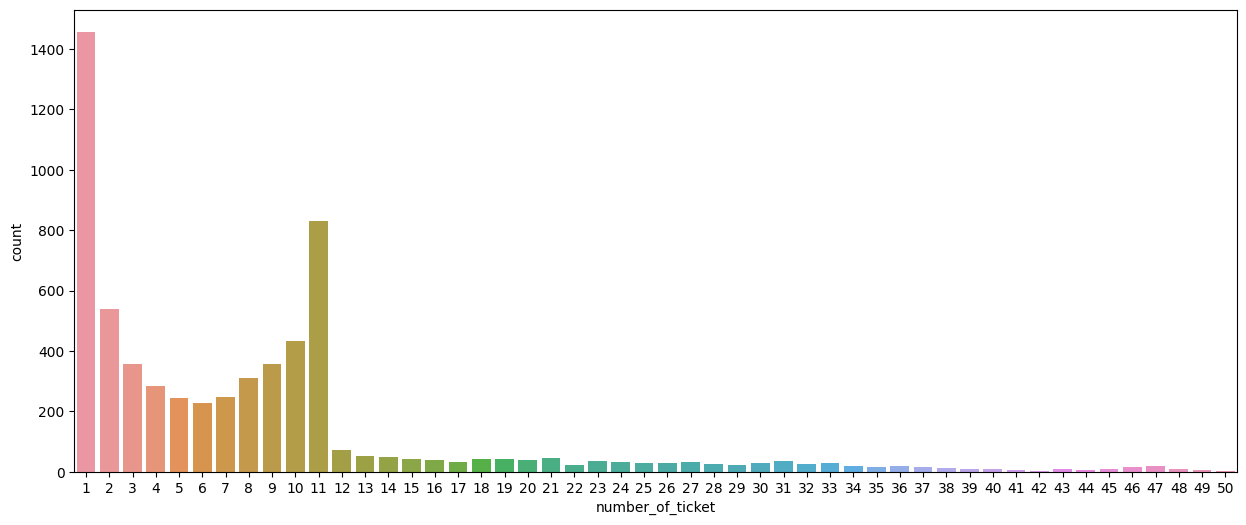

In [ ]:
# Chart-5  visualization code to check numer_of_tickets booked for individual ride.
grp_by_no_of_ticket= df1.groupby('number_of_ticket')
df2 = pd.DataFrame(grp_by_no_of_ticket.size()).reset_index().rename(columns = {0:'count'})
plt.figure(figsize = (15,6))
sns.barplot(x = df2['number_of_ticket'], y  = df2['count'])
plt.show()

##### 1. Why did you pick the specific chart?

To check number of tickets booked for any individual ride.

##### 2. What is/are the insight(s) found from the chart?

We can easily see some times only single ticket is booked for any individual ride. Most of the variation occur between 1 to 11, which may be due to Shuttle car_type, because the maximum capacity of Shuttle is 11.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight will help creating a positive business impact.

###**Bivariate Analysis :-**

#### Chart - 6

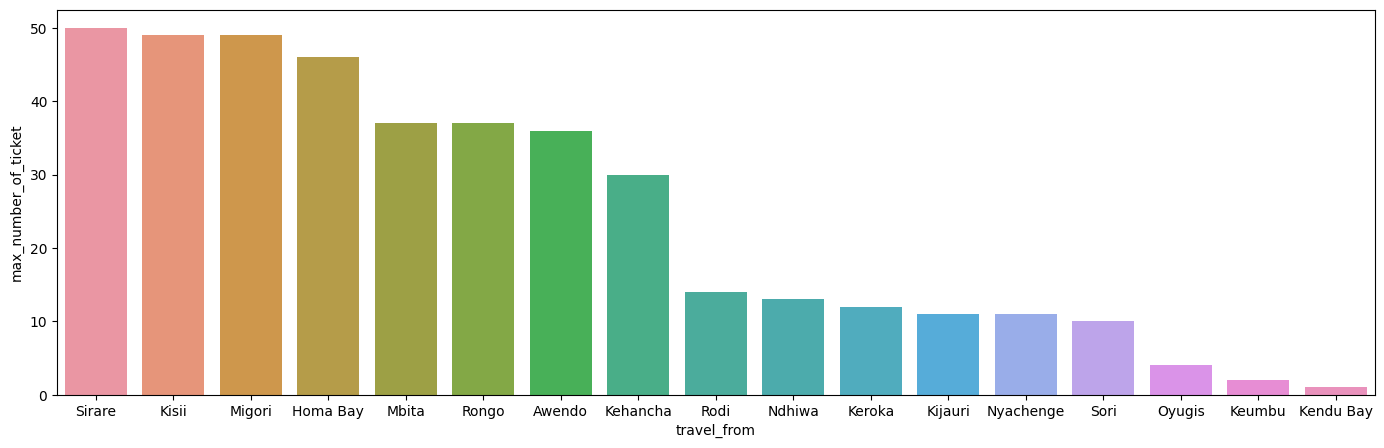

In [ ]:
# Chart-6  visualization code to check maximum number of tickets sell for which route.
df3 = grp_by_travel_from['number_of_ticket'].agg(np.max).reset_index().rename(columns = {'number_of_ticket':'max_number_of_ticket'})
plt.figure(figsize = (17,5))
sns.barplot(x = df3['travel_from'], y = df3['max_number_of_ticket'], data = df3, order = df3.sort_values('max_number_of_ticket', ascending = False).travel_from )
plt.show()

##### 1. Why did you pick the specific chart?

To check maximum number of tickets sell for which route.

##### 2. What is/are the insight(s) found from the chart?

We see maximum number of tickets sell to Sirare followed by Kissi, Migori and Homa Bay.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight will help creating a positive business impact.

#### Chart - 7

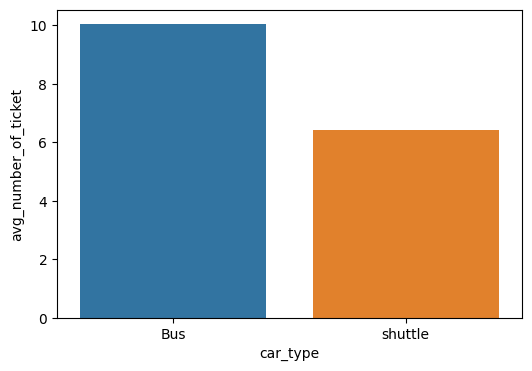

In [ ]:
# Chart-7  visualization code to check average number of tickets sell for different car_type.
df4 = grp_by_car_type['number_of_ticket'].agg(np.mean).reset_index().rename(columns = {'number_of_ticket':'avg_number_of_ticket'})
plt.figure(figsize = (6,4))
sns.barplot(x = df4['car_type'], y = df4['avg_number_of_ticket'])
plt.show()

##### 1. Why did you pick the specific chart?

To check average number of tickets sell for different car_type with an individual ride


##### 2. What is/are the insight(s) found from the chart?

We found that average number of ticket sell for Bus is around 10 and for Shuttle is 6.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight will help creating a positive business impact.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
# There is No Missing Value in our dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# There is No Outlier in our dataset.

### 3. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
#There is No Textual data in our dataset.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Combaining the date column and time column to get the complete timestamp
df1['travel_date_and_time'] = df1['travel_date'] + " " + df1['travel_time']
df1['travel_date_and_time'] = pd.to_datetime(df1['travel_date_and_time'])
df1.drop(['travel_date', 'travel_time'], inplace= True, axis= 1)

In [ ]:
# Extracting the date and time column to get time based informations
 
df1['travel_year']= df1['travel_date_and_time'].dt.year
df1['travel_month']= df1['travel_date_and_time'].dt.month
df1['travel_year_quarter']= df1['travel_date_and_time'].dt.quarter
df1['travel_day_of_year']= df1['travel_date_and_time'].dt.dayofyear
df1['travel_day_of_month']= df1['travel_date_and_time'].dt.day
df1['travel_day_of_week']= df1['travel_date_and_time'].dt.dayofweek
df1['travel_is_in_weekend']= df1['travel_day_of_week'].apply(lambda d: 1 if d in [5,6] else 0)
df1['travel_hour']= df1['travel_date_and_time'].dt.hour
df1['travel_minute']= df1['travel_date_and_time'].dt.minute

In [ ]:
# now shape of dataset
df1.shape

(6249, 19)

In [ ]:
df1.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,travel_month,travel_year_quarter,travel_day_of_year,travel_day_of_month,travel_day_of_week,travel_is_in_weekend,travel_hour,travel_minute
0,1442,15A,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49,1,2017-10-17 07:15:00,2017,10,4,290,17,1,0,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49,1,2017-11-19 07:12:00,2017,11,4,323,19,6,1,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49,1,2017-11-26 07:05:00,2017,11,4,330,26,6,1,7,5
3,5777,19A,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49,5,2017-11-27 07:10:00,2017,11,4,331,27,0,0,7,10
4,5778,11A,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49,31,2017-11-27 07:12:00,2017,11,4,331,27,0,0,7,12


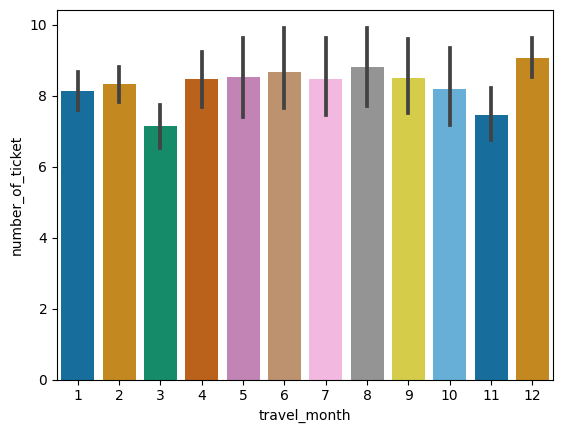

<Figure size 1000x600 with 0 Axes>

In [ ]:
# plot month wise travellings happened
sns.barplot(x="travel_month", y="number_of_ticket", data=df1, palette='colorblind')
fig = plt.figure(figsize=(10,6))


we see from above graph ticket booings are happened in all months of year.

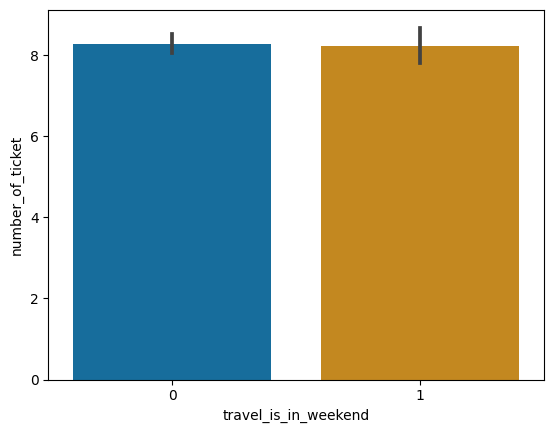

<Figure size 500x300 with 0 Axes>

In [ ]:
# plot to see if there is large numer of bookings in weekends.
sns.barplot(x="travel_is_in_weekend", y="number_of_ticket", data=df1, palette='colorblind')
fig = plt.figure(figsize=(5,3))
# 0 for weekdays, 1 for weekend

we see for weekdays and weekends ticket bookings are almost equal.

Text(0.5, 1.0, 'travel counts based on dates of a month')

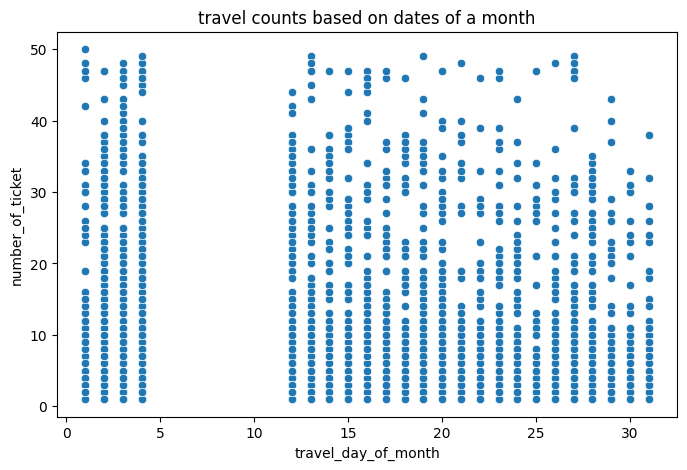

In [ ]:
# To check travel counts on the basis of dates of month
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.scatterplot(x="travel_day_of_month", y="number_of_ticket", data=df1)
ax.set_title('travel counts based on dates of a month')

we can see there is gap between dates 5 to 11. we can assume that there is official holiday of public transport between these days. but in rest of days number of tickets booking is same.

Text(0.5, 1.0, 'travel counts based on hours of a day')

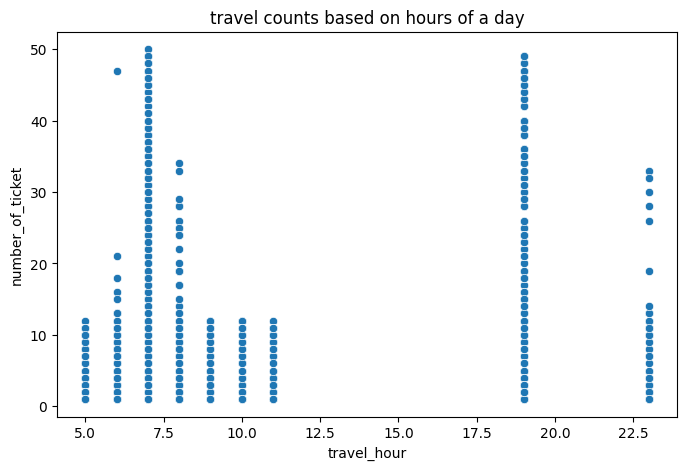

In [ ]:
# To check travel counts on the basis of hours of a day.
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
sns.scatterplot(x="travel_hour", y="number_of_ticket", data=df1)
ax.set_title('travel counts based on hours of a day')

We can see that most of the ticket bookings happened around 7 AM and 7 PM. that may be time of people to go to work or office.
#####Also there is no ride between 12 PM to 6 PM.

In [ ]:
# Define function to convert travel time to period
def period(h):
  '''This function can take hours as input and return the time period of a day as output'''
  if h >= 7 and h < 11:
    return 'morning'
  elif h >= 11 and h < 15:
    return 'after_noon'
  elif h >= 15 and h < 19:
    return 'evening'
  elif h >= 19 and h <= 24:
    return 'night'
  else:
    return 'early_morning'

In [ ]:
# Apply above period function to travel_hour column & create a new column 'travel_period'
df1['travel_period'] = df1.travel_hour.apply(period)

In [ ]:
df1.shape

(6249, 20)

In [ ]:
# Creating a seperate column for giving hour wise weights for the travel_hours column
travel_period_counts = dict(df1.travel_period.value_counts())
df1['hour_wise_weights'] = np.log1p(df1.travel_period.map(travel_period_counts))
     

In [ ]:
# Creating a seperate column for giving day of a year wise weights for travel_day_of_year column
day_of_year_counts = dict(df1.travel_day_of_year.value_counts())
df1['day_of_year_wise_weights'] = np.log1p(df1.travel_day_of_year.map(day_of_year_counts))

In [ ]:
# Count number of tickets booked in each dates of a month
df1.travel_day_of_month.value_counts()

2     706
12    685
3     659
4     446
1     267
13    249
14    247
16    238
28    228
19    226
18    226
15    213
17    209
20    202
22    192
21    183
27    179
29    177
23    159
24    137
26    120
30    113
25     96
31     92
Name: travel_day_of_month, dtype: int64

In [ ]:
# Giving weights to the each days of the month based on the frequency of ticket bookings
day_of_month_wise_weights_dict = {2:1, 12:1, 3:1, 4:2, 1:3, 13:3, 14:3, 16:3, 28:3, 19:3, 18:3, 15:3, 17:3, 20:3, 22:4, 21:4, 27:4, 29:4, 23:4, 24:4, 26:4, 30:4, 25:4, 31:4}
df1['day_of_month_wise_weights'] = df1.travel_day_of_month.replace(day_of_month_wise_weights_dict)

df1.day_of_month_wise_weights.value_counts()    # check value counts

3    2305
1    2050
4    1448
2     446
Name: day_of_month_wise_weights, dtype: int64

In [ ]:
# Count number of tickets booked in each month of a year
df1.travel_month.value_counts()

12    1050
2      985
1      896
3      853
4      600
11     414
9      262
7      254
8      251
10     247
6      225
5      212
Name: travel_month, dtype: int64

In [ ]:
# Creating a column for giving weights to the each months of a year based on the frequency of ticket bookings
month_wise_weights_dict = {12:1, 2:1, 1:1, 3:1, 4:1, 11:2, 9:3, 7:3, 8:3, 10:3, 6:3, 5:3}
df1['month_wise_weights'] = df1.travel_month.replace(month_wise_weights_dict)
     
df1.month_wise_weights.value_counts()    # check value counts

1    4384
3    1451
2     414
Name: month_wise_weights, dtype: int64

In [ ]:
# Now check columns we have
df1.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,number_of_ticket,travel_date_and_time,...,travel_day_of_month,travel_day_of_week,travel_is_in_weekend,travel_hour,travel_minute,travel_period,hour_wise_weights,day_of_year_wise_weights,day_of_month_wise_weights,month_wise_weights
0,1442,15A,Mpesa,UZUEHCBUSO,Migori,Nairobi,Bus,49,1,2017-10-17 07:15:00,...,17,1,0,7,15,morning,8.494743,0.693147,3,3
1,5437,14A,Mpesa,TIHLBUSGTE,Migori,Nairobi,Bus,49,1,2017-11-19 07:12:00,...,19,6,1,7,12,morning,8.494743,0.693147,3,2
2,5710,8B,Mpesa,EQX8Q5G19O,Keroka,Nairobi,Bus,49,1,2017-11-26 07:05:00,...,26,6,1,7,5,morning,8.494743,0.693147,4,2
3,5777,19A,Mpesa,SGP18CL0ME,Homa Bay,Nairobi,Bus,49,5,2017-11-27 07:10:00,...,27,0,0,7,10,morning,8.494743,3.871201,4,2
4,5778,11A,Mpesa,BM97HFRGL9,Migori,Nairobi,Bus,49,31,2017-11-27 07:12:00,...,27,0,0,7,12,morning,8.494743,3.871201,4,2


In [ ]:
# define a function to calculate timing difference between two consecutive Bus

def calculate_timing_difference(df1):
  df1.sort_values(['travel_from', 'travel_date_and_time'], inplace= True)
  df1['diff_btw_next_and_previous_bus'] = (df1.groupby(['travel_from']).travel_date_and_time.shift(-1) - df1.groupby(['travel_from']).travel_date_and_time.shift(1)).dt.total_seconds()/3600
  df1['diff_btw_1bus_and_next_bus'] = (df1.travel_date_and_time - df1.groupby(['travel_from']).travel_date_and_time.shift(-1)).dt.total_seconds()/3600
  df1['diff_btw_1bus_and_previous_bus'] = (df1.travel_date_and_time - df1.groupby(['travel_from']).travel_date_and_time.shift(1)).dt.total_seconds()/3600
  df1['diff_btw_2bus_and_next_bus'] = (df1.travel_date_and_time - df1.groupby(['travel_from']).travel_date_and_time.shift(-2)).dt.total_seconds()/3600
  df1['diff_btw_2bus_and_previous_bus'] = (df1.travel_date_and_time - df1.groupby(['travel_from']).travel_date_and_time.shift(2)).dt.total_seconds()/3600
  df1['diff_btw_3bus_and_next_bus'] = (df1.travel_date_and_time - df1.groupby(['travel_from']).travel_date_and_time.shift(-3)).dt.total_seconds()/3600
  df1['diff_btw_3bus_and_previous_bus'] = (df1.travel_date_and_time - df1.groupby(['travel_from']).travel_date_and_time.shift(3)).dt.total_seconds()/3600
  
  new_columns = ['diff_btw_next_and_previous_bus', 'diff_btw_1bus_and_next_bus', 'diff_btw_1bus_and_previous_bus', 'diff_btw_2bus_and_next_bus', 'diff_btw_2bus_and_previous_bus', 'diff_btw_3bus_and_next_bus','diff_btw_3bus_and_previous_bus']
  df1[new_columns] = df1.groupby(['travel_from'])[new_columns].fillna(method = 'ffill')
  df1[new_columns] = df1.groupby(['travel_from'])[new_columns].fillna(method = 'backfill')
  
  return df1


In [ ]:
# take function value in dataframe
df1 = calculate_timing_difference(df1)


In [ ]:
# check for null values
df1.isnull().sum()

ride_id                           0
car_type                          0
max_capacity                      0
number_of_ticket                  0
travel_date_and_time              0
travel_year                       0
travel_month                      0
travel_year_quarter               0
travel_day_of_year                0
travel_day_of_month               0
travel_day_of_week                0
travel_is_in_weekend              0
travel_hour                       0
travel_minute                     0
travel_period                     0
hour_wise_weights                 0
day_of_year_wise_weights          0
diff_btw_next_and_previous_bus    3
diff_btw_1bus_and_next_bus        1
diff_btw_1bus_and_previous_bus    1
diff_btw_2bus_and_next_bus        3
diff_btw_2bus_and_previous_bus    3
diff_btw_3bus_and_next_bus        3
diff_btw_3bus_and_previous_bus    3
travel_distance                   0
travel_time                       0
travel_speed                      0
travel_arrival_date         

we see there is some null values in our newly created columns, so we will drop it.

In [ ]:
# drop null values from dataset
df1.dropna(inplace= True)

# now check shape
df1.shape

(6246, 55)

Now let us find the distance between  all origin points to destination point. here we used Nairobi Map to estimate the distances.

In [ ]:
# point the distances between origin to destination
travel_distance_dict =  {'Migori': 372 , 'Keroka': 281, 'Homa Bay':360, 'Kisii':306, 'Keumbu':295, 'Rongo':332,'Kijauri':272, 'Oyugis':324, 'Awendo':351, 'Sirare':393, 
                         'Nyachenge':313, 'Kehancha': 308, 'Kendu Bay':343, 'Sori':407, 'Rodi':348, 'Mbita':406, 'Ndhiwa': 377}

df1["travel_distance"] = df1.travel_from.map(travel_distance_dict)

<Axes: xlabel='travel_from', ylabel='travel_distance'>

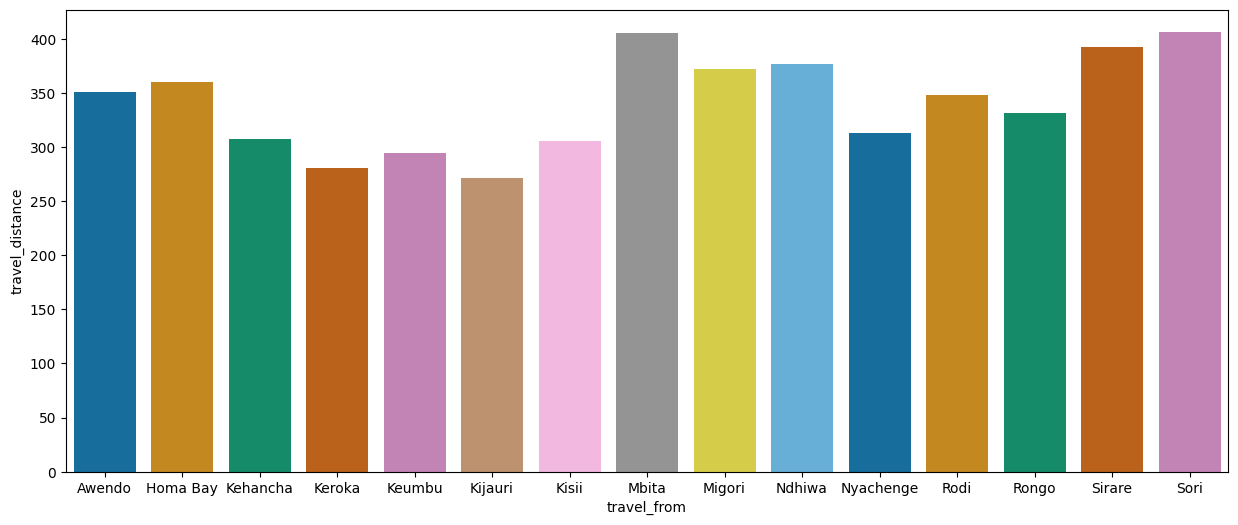

In [ ]:
# Plot origin to destination point distances
fig = plt.figure(figsize=(15,6))
sns.barplot(x="travel_from", y="travel_distance", data=df1, palette='colorblind')


we can see largest distance route is 'Mbita to Nairobi' and the least distance route is 'Kijauri to Nairobi'.

In [ ]:
# point the time taken to reach out the destination
travel_time_dict = {'Migori': 7*60+14 , 'Keroka': 5*60+11, 'Homa Bay':6*60+45, 'Kisii':5*60+45, 'Keumbu':5*60+31, 'Rongo':6*60+25,'Kijauri':5*60,'Oyugis':5*60+53, 'Awendo':6*60+46, 
                     'Sirare':7*60+52, 'Nyachenge':6*60, 'Kehancha':6*60+48,'Kendu Bay':6*60+12, 'Sori':7*60+24, 'Rodi':6*60+27, 'Mbita':7*60+18, 'Ndhiwa': 6*60+51}

df1['travel_time'] = df1.travel_from.map(travel_time_dict)


In [ ]:
# import timedelta
from datetime import timedelta

for key in travel_time_dict.keys(): 
    travel_time_dict[key] = timedelta (minutes=travel_time_dict[key])
# to see time in seconds
travel_time_dict

{'Migori': datetime.timedelta(seconds=26040),
 'Keroka': datetime.timedelta(seconds=18660),
 'Homa Bay': datetime.timedelta(seconds=24300),
 'Kisii': datetime.timedelta(seconds=20700),
 'Keumbu': datetime.timedelta(seconds=19860),
 'Rongo': datetime.timedelta(seconds=23100),
 'Kijauri': datetime.timedelta(seconds=18000),
 'Oyugis': datetime.timedelta(seconds=21180),
 'Awendo': datetime.timedelta(seconds=24360),
 'Sirare': datetime.timedelta(seconds=28320),
 'Nyachenge': datetime.timedelta(seconds=21600),
 'Kehancha': datetime.timedelta(seconds=24480),
 'Kendu Bay': datetime.timedelta(seconds=22320),
 'Sori': datetime.timedelta(seconds=26640),
 'Rodi': datetime.timedelta(seconds=23220),
 'Mbita': datetime.timedelta(seconds=26280),
 'Ndhiwa': datetime.timedelta(seconds=24660)}

In [ ]:
# calculate speed on the basis of distance and time.
df1['travel_speed'] = df1.travel_distance / df1.travel_time     

In [ ]:
# to find the date of traveling from origin 
df1["traveling_date_from_origin"] = df1.travel_from.map(travel_time_dict)

# to find arrival date, hour, minute
df1['travel_arrival_date_'] = df1.travel_from.map(travel_time_dict)
df1['travel_arrival_date'] = df1.travel_date_and_time + df1['traveling_date_from_origin']
df1['travel_arrival_hour'] = df1.travel_arrival_date.dt.hour
df1['travel_arrival_minute'] = df1.travel_arrival_date.dt.minute
df1["travel_is_in_rush_hour"]= df1.travel_arrival_hour.apply(lambda h: 1 if (h>=7) and (h<= 17) else 0)

In [ ]:
# delete columns
del df1["traveling_date_from_origin"],df1["travel_arrival_date_"]

In [ ]:
# to get top 5 rows
df1.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_from,travel_to,car_type,max_capacity,number_of_ticket,travel_date_and_time,...,diff_btw_2bus_and_previous_bus,diff_btw_3bus_and_next_bus,diff_btw_3bus_and_previous_bus,travel_distance,travel_time,travel_speed,travel_arrival_date,travel_arrival_hour,travel_arrival_minute,travel_is_in_rush_hour
502,6654,24B,Mpesa,UMAPNYPBAS,Awendo,Nairobi,Bus,49,2,2017-05-12 07:08:00,...,5688.066667,-5688.083333,5688.083333,351,406,0.864532,2017-05-12 13:54:00,13,54,1
5530,12926,25,Mpesa,NOXLCPZ2MO,Awendo,Nairobi,Bus,49,20,2018-01-04 07:08:00,...,5688.066667,-0.866667,5688.083333,351,406,0.864532,2018-01-04 13:54:00,13,54,1
5533,12929,16A,Mpesa,VSJSFSMOFG,Awendo,Nairobi,Bus,49,2,2018-01-04 07:12:00,...,5688.066667,-215.933333,5688.083333,351,406,0.864532,2018-01-04 13:58:00,13,58,1
5539,12935,21B,Mpesa,2MLD47XLVU,Awendo,Nairobi,Bus,49,9,2018-01-04 07:13:00,...,0.083333,-216.033333,5688.083333,351,406,0.864532,2018-01-04 13:59:00,13,59,1
5528,12924,16B,Mpesa,6KYCTDYHDJ,Awendo,Nairobi,Bus,49,15,2018-01-04 08:00:00,...,0.800000,-239.133333,0.866667,351,406,0.864532,2018-01-04 14:46:00,14,46,1


In [ ]:
# now see columns we have
df1.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_from', 'travel_to', 'car_type', 'max_capacity',
       'number_of_ticket', 'travel_date_and_time', 'travel_year',
       'travel_month', 'travel_year_quarter', 'travel_day_of_year',
       'travel_day_of_month', 'travel_day_of_week', 'travel_is_in_weekend',
       'travel_hour', 'travel_minute', 'travel_period', 'hour_wise_weights',
       'day_of_year_wise_weights', 'day_of_month_wise_weights',
       'month_wise_weights', 'diff_btw_next_and_previous_bus',
       'diff_btw_1bus_and_next_bus', 'diff_btw_1bus_and_previous_bus',
       'diff_btw_2bus_and_next_bus', 'diff_btw_2bus_and_previous_bus',
       'diff_btw_3bus_and_next_bus', 'diff_btw_3bus_and_previous_bus',
       'travel_distance', 'travel_time', 'travel_speed', 'travel_arrival_date',
       'travel_arrival_hour', 'travel_arrival_minute',
       'travel_is_in_rush_hour'],
      dtype='object')

###  **Categorical Encoding**

In [ ]:
# Encode your categorical columns
categorical_features = ['travel_from','month_wise_weights','day_of_month_wise_weights']
df1 = pd.get_dummies(df1, columns=categorical_features)
label_enc = {'Bus':1, 'shuttle':0}
df1.car_type.replace(label_enc, inplace= True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Here we use 'Label Encoding' and 'Dummy Encoding' techniques. We did Label Encoding on car_type column which has only two labels, so we converted those labels to 0 and 1. we did Dummy Encoding on other categorical features to transform the categorical variables into a set of binary variables.

In [ ]:
# Now check columns we have
df1.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_to,car_type,max_capacity,number_of_ticket,travel_date_and_time,travel_year,...,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,month_wise_weights_1,month_wise_weights_2,month_wise_weights_3,day_of_month_wise_weights_1,day_of_month_wise_weights_2,day_of_month_wise_weights_3,day_of_month_wise_weights_4
502,6654,24B,Mpesa,UMAPNYPBAS,Nairobi,1,49,2,2017-05-12 07:08:00,2017,...,0,0,0,0,0,1,1,0,0,0
5530,12926,25,Mpesa,NOXLCPZ2MO,Nairobi,1,49,20,2018-01-04 07:08:00,2018,...,0,0,0,1,0,0,0,1,0,0
5533,12929,16A,Mpesa,VSJSFSMOFG,Nairobi,1,49,2,2018-01-04 07:12:00,2018,...,0,0,0,1,0,0,0,1,0,0
5539,12935,21B,Mpesa,2MLD47XLVU,Nairobi,1,49,9,2018-01-04 07:13:00,2018,...,0,0,0,1,0,0,0,1,0,0
5528,12924,16B,Mpesa,6KYCTDYHDJ,Nairobi,1,49,15,2018-01-04 08:00:00,2018,...,0,0,0,1,0,0,0,1,0,0


#### 2. Feature Selection

In [ ]:
# Dropping the columns which are not relevant to our target variable
df1.drop(['seat_number','payment_method','payment_receipt', 'travel_to', ], inplace= True, axis = 1)

In [ ]:
# Select your features wisely to avoid overfitting
required_columns = ['car_type', 'travel_day_of_week','travel_day_of_year', 'travel_is_in_weekend', 'travel_hour', 'travel_year', 'travel_year_quarter',
       'hour_wise_weights', 'day_of_year_wise_weights',
       'diff_btw_next_and_previous_bus','diff_btw_1bus_and_next_bus', 'diff_btw_1bus_and_previous_bus','diff_btw_2bus_and_next_bus',
        'diff_btw_2bus_and_previous_bus','diff_btw_3bus_and_next_bus', 'diff_btw_3bus_and_previous_bus',
       'travel_distance', 'travel_time', 'travel_speed', 'travel_arrival_hour', 'travel_is_in_rush_hour', 
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha','travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri','travel_from_Kisii',
       'travel_from_Mbita', 'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi', 
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'day_of_month_wise_weights_1','day_of_month_wise_weights_2','day_of_month_wise_weights_3','day_of_month_wise_weights_4',
       'month_wise_weights_1', 'month_wise_weights_2', 'month_wise_weights_3',
       'number_of_ticket']

In [ ]:
# make a copy of our dataset which only contains required columns for analysis
df2 = df1[required_columns]
df2.shape

(6246, 44)

##### What all feature selection methods have you used  and why?

In [ ]:
# Correlation Heatmap visualization code
df5 = df2[['car_type', 'travel_day_of_week','travel_day_of_year', 'travel_is_in_weekend', 'travel_hour', 'travel_year', 'travel_year_quarter',
       'hour_wise_weights', 'day_of_year_wise_weights',
       'diff_btw_next_and_previous_bus','diff_btw_1bus_and_next_bus', 'diff_btw_1bus_and_previous_bus','diff_btw_2bus_and_next_bus',
        'diff_btw_2bus_and_previous_bus','diff_btw_3bus_and_next_bus', 'diff_btw_3bus_and_previous_bus',
       'travel_distance', 'travel_time', 'travel_speed', 'travel_arrival_hour', 'travel_is_in_rush_hour', 
       'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha','travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri','travel_from_Kisii',
       'travel_from_Mbita', 'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi', 
       'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori',
       'day_of_month_wise_weights_1','day_of_month_wise_weights_2','day_of_month_wise_weights_3','day_of_month_wise_weights_4',
       'month_wise_weights_1', 'month_wise_weights_2', 'month_wise_weights_3',
       'number_of_ticket']]
corr_df = df5.corr()
corr_df  


,car_type,travel_day_of_week,travel_day_of_year,travel_is_in_weekend,travel_hour,travel_year,travel_year_quarter,hour_wise_weights,day_of_year_wise_weights,diff_btw_next_and_previous_bus,...,travel_from_Sirare,travel_from_Sori,day_of_month_wise_weights_1,day_of_month_wise_weights_2,day_of_month_wise_weights_3,day_of_month_wise_weights_4,month_wise_weights_1,month_wise_weights_2,month_wise_weights_3,number_of_ticket
car_type,1.000000,0.030249,-0.086728,0.048603,0.070256,0.180283,-0.082670,0.167723,-0.191676,0.135496,...,0.174059,0.055545,-0.123250,0.157338,-0.005143,0.046993,0.035206,-0.046572,-0.010710,0.209180
travel_day_of_week,0.030249,1.000000,0.028382,0.782624,0.020635,0.016803,0.003436,0.011023,-0.122106,0.022608,...,0.009699,0.001041,-0.011135,0.042028,0.018840,-0.034809,0.016950,0.082700,-0.067112,0.001067
travel_day_of_year,-0.086728,0.028382,1.000000,0.031603,0.034764,-0.617339,0.974904,-0.048460,0.166692,0.040428,...,-0.073865,0.001573,0.110984,0.075514,-0.050062,-0.112323,-0.383922,0.345928,0.212237,0.028407
travel_is_in_weekend,0.048603,0.782624,0.031603,1.000000,0.004840,0.060328,0.008066,0.020527,-0.175081,0.017082,...,0.012598,-0.000903,0.026332,0.050362,-0.008583,-0.050221,-0.013835,0.071604,-0.027206,-0.003369
travel_hour,0.070256,0.020635,0.034764,0.004840,1.000000,-0.008585,0.048080,-0.414438,0.092631,0.059445,...,0.260745,0.104790,0.003041,0.019718,0.036831,-0.057544,0.004279,0.006959,-0.008739,0.215051
travel_year,0.180283,0.016803,-0.617339,0.060328,-0.008585,1.000000,-0.575032,0.044922,-0.184711,-0.042699,...,0.105804,0.033764,-0.113691,0.165194,0.027727,-0.006034,0.113043,-0.110600,-0.057338,-0.007142
travel_year_quarter,-0.082670,0.003436,0.974904,0.008066,0.048080,-0.575032,1.000000,-0.057118,0.195800,0.059757,...,-0.073858,0.011952,0.187713,0.105639,-0.074798,-0.187793,-0.457544,0.371965,0.276688,0.032419
hour_wise_weights,0.167723,0.011023,-0.048460,0.020527,-0.414438,0.044922,-0.057118,1.000000,-0.040494,-0.054136,...,-0.251345,-0.043951,-0.010589,-0.037217,-0.001951,0.036728,-0.000772,-0.010176,0.006834,0.001177
day_of_year_wise_weights,-0.191676,-0.122106,0.166692,-0.175081,0.092631,-0.184711,0.195800,-0.040494,1.000000,-0.070436,...,-0.049580,0.001502,0.423378,-0.145934,-0.108819,-0.257560,-0.167124,0.011936,0.174105,0.066308
diff_btw_next_and_previous_bus,0.135496,0.022608,0.040428,0.017082,0.059445,-0.042699,0.059757,-0.054136,-0.070436,1.000000,...,0.022770,0.175948,0.024761,0.209819,-0.057608,-0.089724,-0.164783,0.032100,0.159682,0.014952


<Axes: >

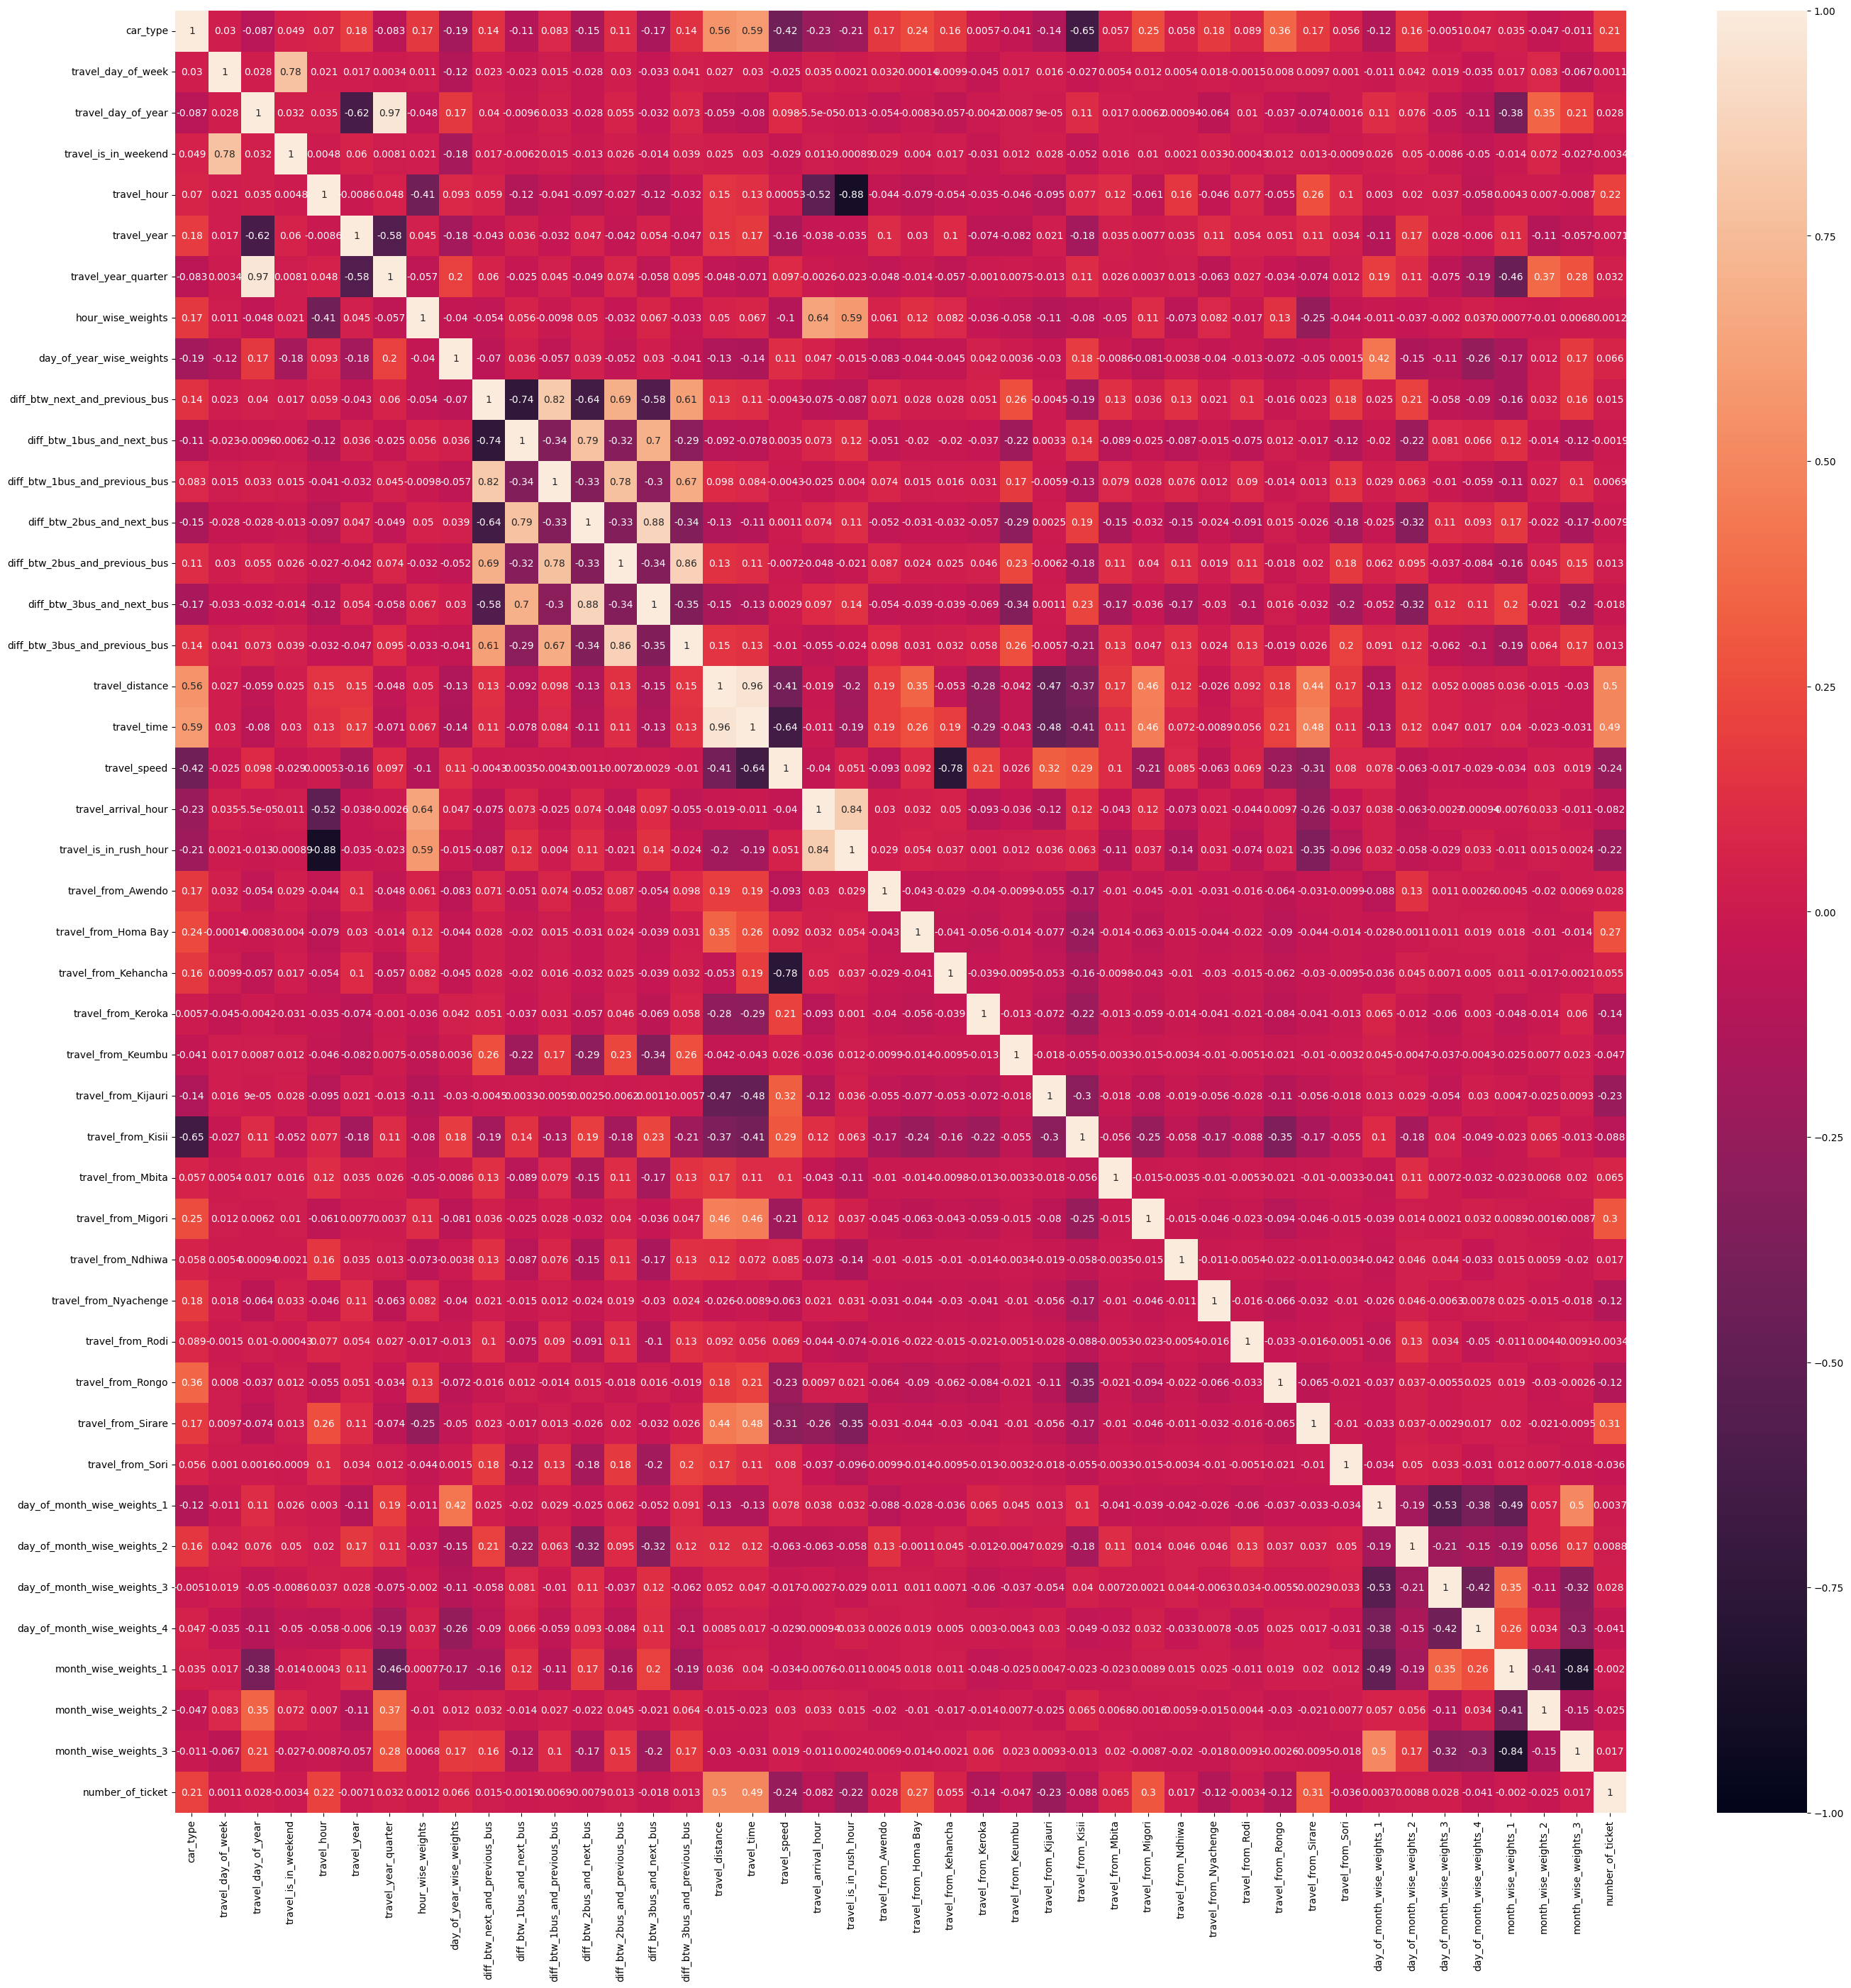

In [ ]:
# plot heatmap
plt.figure(figsize=(33,33))
sns.heatmap(corr_df, vmin=-1, cmap='rocket', annot=True)

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, data transformation is needed. here we just seperate dependent and independent variables

In [ ]:
# Transform Your data
# Seperating dependent and independent variables of our dataset
X = df2.drop(labels='number_of_ticket', axis=1)
Y = df2['number_of_ticket']

# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {Y.shape} respectively.")

The Number of Rows and Columns in X is (6246, 43) respectively.
The Number of Rows and Columns in Y is (6246,) respectively.


### 4. Data Scaling

In [ ]:
# Scaling your data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[1.        , 0.66666667, 0.35989011, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 0.5       , 0.00824176, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.5       , 0.00824176, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.84340659, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.16666667, 0.92582418, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.16666667, 0.92582418, ..., 1.        , 0.        ,
        0.        ]])

##### Which method have you used to scale you data and why?

Here we use MinMax Scaler method, it scales the data to a fixed range, typically between 0 and 1.

### 5. Dimesionality Reduction


##### Do you think that dimensionality reduction is needed? Explain Why?

#### Yes,dimensionality reduction is needed because in this we dropping the columns which are not relevant to our target variable

In [ ]:
# DImensionality Reduction (If needed)
# Already Done

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Importing train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 42)

In [ ]:
# to get the shape of Train Test set.

print("Training Dataset Shape:")
print("X_train shape ", X_train.shape)
print("Y_train shape ", Y_train.shape)
print('\n')
print("Testing Dataset Shape:")
print("X_test shape ",X_test.shape)
print("Y_test shape ",Y_test.shape)

Training Dataset Shape:
X_train shape  (4996, 43)
Y_train shape  (4996,)


Testing Dataset Shape:
X_test shape  (1250, 43)
Y_test shape  (1250,)


##### What data splitting ratio have you used and why? 

Here we used 80% and 20% Training and Testing data respectively.The data should be divided in such a way that neither of them is too high nor too small.

### 7. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

In [ ]:
# Handling Imbalanced Dataset (If needed)
# Not needed

## ***6. ML Model Implementation***

In [ ]:
# import required sklearn packages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score
     

### ML Model - 1

##**Random Forest Regressor**

In [ ]:
# ML Model - 1 Implementation
# Importing the RandomForest packages
from sklearn.ensemble import RandomForestRegressor

# Fit the Algorithm
rf_reg = RandomForestRegressor(criterion='squared_error', max_leaf_nodes=10, random_state=30)
rf_reg.fit(X_train, Y_train)

# Predict on the model
Y_train_rf_reg = rf_reg.predict(X_train)
Y_test_rf_reg = rf_reg.predict(X_test)

# see regression score 
print("Train data Reg Score :",rf_reg.score(X_train,Y_train))
print("Test data Reg Score :",rf_reg.score(X_test,Y_test))

Train data Reg Score : 0.5459634593648642
Test data Reg Score : 0.5333355392338219


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Evaluation metrics for training data
MSE_train_rf_reg  = mean_squared_error(Y_train, Y_train_rf_reg)
print("MSE for Train data :" , MSE_train_rf_reg)

RMSE_train_rf_reg = np.sqrt(MSE_train_rf_reg)
print("RMSE for Train data:" ,RMSE_train_rf_reg)

MAE_train_rf_reg = mean_absolute_error(Y_train, Y_train_rf_reg)
print("MAE for Train data:" ,MAE_train_rf_reg)

MAPE_train_rf_reg = mean_absolute_percentage_error(Y_train, Y_train_rf_reg)
print("MAPE for Train data:" ,MAPE_train_rf_reg)

r2_score_train_rf_reg = r2_score(Y_train, Y_train_rf_reg)
print("R2 for Train data:" ,r2_score_train_rf_reg)

MSE for Train data : 32.71624519156841
RMSE for Train data: 5.719811639518246
MAE for Train data: 3.9089486892460696
MAPE for Train data: 1.308550451905842
R2 for Train data: 0.5459634593648642


In [ ]:
# Evaluation metrics for test data
MSE_test_rf_reg  = mean_squared_error(Y_test, Y_test_rf_reg)
print("MSE for Test data :" , MSE_test_rf_reg)

RMSE_test_rf_reg = np.sqrt(MSE_test_rf_reg)
print("RMSE for Test data:" ,RMSE_test_rf_reg)

MAE_test_rf_reg = mean_absolute_error(Y_test, Y_test_rf_reg)
print("MAE for Test data:" ,MAE_test_rf_reg)

MAPE_test_rf_reg = mean_absolute_percentage_error(Y_test, Y_test_rf_reg)
print("MAPE for Test data:" ,MAPE_test_rf_reg)

r2_score_test_rf_reg = r2_score(Y_test, Y_test_rf_reg)
print("R2 for Test data:" ,r2_score_test_rf_reg)

MSE for Test data : 39.33503509984531
RMSE for Test data: 6.2717649110792815
MAE for Test data: 4.234498707764687
MAPE for Test data: 1.4358248982968504
R2 for Test data: 0.5333355392338219


We use Random Forest Regressor here, we have very low training and testing accuracy. Now tryting to improving the accuracy by using hyperparameter tuning technique.

#### 2. Cross- Validation & Hyperparameter Tuning

###**Grid Search Cross Validation on Random Forest Regressor**

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Create the parameters grid
parameters = {  'ccp_alpha':[0.01,0.1,1,10,100],
              'max_depth': [4, 6, 8],
            'min_samples_leaf': [40, 50],
            'min_samples_split': [50, 100, 150]  
}

In [ ]:
# Importing the GridSearch Cross Valiation Packages
from sklearn.model_selection import GridSearchCV
rf =RandomForestRegressor()
rf_grid =GridSearchCV(rf, param_grid=parameters, verbose=1, cv=2)
rf_grid.fit(X, Y)

Fitting 2 folds for each of 90 candidates, totalling 180 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150]},
             verbose=1)

In [ ]:
# Viewing the best parameters of the optimal model
rf_grid.best_params_

{'ccp_alpha': 0.1,
 'max_depth': 6,
 'min_samples_leaf': 50,
 'min_samples_split': 100}

In [ ]:
rf_grid.best_estimator_

RandomForestRegressor(ccp_alpha=0.1, max_depth=6, min_samples_leaf=50,
                      min_samples_split=100)

In [ ]:
# Predicting the values of training data using the calculated optimal model
rf_grid_optimal_model =rf_grid.best_estimator_
Y_train_pred_gridCV = rf_grid_optimal_model.predict(X_train)

In [ ]:
# Evaluation metrics for training data
MSE_train_rf_reg_best_gridCV  = mean_squared_error(Y_train, Y_train_pred_gridCV)
print("MSE for Train data :" , MSE_train_rf_reg_best_gridCV)

RMSE_train_rf_reg_best_gridCV = np.sqrt(MSE_train_rf_reg_best_gridCV)
print("RMSE for Train data:" ,RMSE_train_rf_reg_best_gridCV)

MAE_train_rf_reg_best_gridCV = mean_absolute_error(Y_train, Y_train_pred_gridCV)
print("MAE for Train data:" ,MAE_train_rf_reg_best_gridCV)

MAPE_train_rf_reg_best_gridCV = mean_absolute_percentage_error(Y_train, Y_train_pred_gridCV)
print("MAPE for Train data:" ,MAPE_train_rf_reg_best_gridCV)

r2_score_train_rf_reg_gridCV = r2_score(Y_train, Y_train_pred_gridCV)
print("R2 for Train data:" ,r2_score_train_rf_reg_gridCV)

MSE for Train data : 30.046918660559665
RMSE for Train data: 5.481506969854154
MAE for Train data: 3.524323779573481
MAPE for Train data: 1.1341860227043048
R2 for Train data: 0.5830084129305364


In [ ]:
# Predicting the target values of test data using calculated best model
Y_test_pred_gridCV = rf_grid_optimal_model.predict(X_test)

In [ ]:
# Evaluation metrics for test data
MSE_test_rf_reg_best_gridCV  = mean_squared_error(Y_test, Y_test_pred_gridCV)
print("MSE for Test data :" , MSE_test_rf_reg_best_gridCV)

RMSE_test_rf_reg_best_gridCV = np.sqrt(MSE_test_rf_reg_best_gridCV)
print("RMSE for Test data:" ,RMSE_test_rf_reg_best_gridCV)

MAE_test_rf_reg_best_gridCV = mean_absolute_error(Y_test, Y_test_pred_gridCV)
print("MAE for Test data:" ,MAE_test_rf_reg_best_gridCV)

MAPE_test_rf_reg_best_gridCV = mean_absolute_percentage_error(Y_test, Y_test_pred_gridCV)
print("MAPE for Test data:" ,MAPE_test_rf_reg_best_gridCV)

r2_score_test_rf_reg_best_gridCV = r2_score(Y_test, Y_test_pred_gridCV)
print("R2 for Test data:" ,r2_score_test_rf_reg_best_gridCV)

MSE for Test data : 35.05649538464263
RMSE for Test data: 5.920852589335647
MAE for Test data: 3.770188669961728
MAPE for Test data: 1.1992498924915487
R2 for Test data: 0.584095438748176


##### Which hyperparameter optimization technique have you used and why?

Here we have used GridSreach CV hyperparameter optimization technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes we have seen improvement in Accuracy.
#####**Accuracy before hyperparameter tuning :**
#####Traning Accuracy- 54%
#####Testing Accuracy- 53%

#####**Accuracy After hyperparameter tuning :**
#####Traning Accuracy- 58%
#####Testing Accuracy- 58%

### ML Model - 2

###**Gradient Boosting Regressor**

In [ ]:
# ML Model - 1 Implementation
# Importing the GradientBoosting algorithm
from sklearn.ensemble import GradientBoostingRegressor

# Training the simple gradient Boosting model
gb_reg = GradientBoostingRegressor(random_state= 42)
gb_reg.fit(X_train, Y_train)


# Predicting the values for tarining data
Y_train_gb_reg = gb_reg.predict(X_train)

# Predicting the values for test data
Y_test_gb_reg = gb_reg.predict(X_test)


print("Train data Reg Score :",gb_reg.score(X_train,Y_train))
print("Test data Reg Score :",gb_reg.score(X_test,Y_test))
     

Train data Reg Score : 0.661601605008432
Test data Reg Score : 0.611409329185527


In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics for training data
MSE_train_gb_reg  = mean_squared_error(Y_train, Y_train_gb_reg)
print("MSE for Train data :" , MSE_train_gb_reg)

RMSE_train_gb_reg = np.sqrt(MSE_train_gb_reg)
print("RMSE for Train data:" ,RMSE_train_gb_reg)

MAE_train_gb_reg = mean_absolute_error(Y_train, Y_train_gb_reg)
print("MAE for Train data:" ,MAE_train_gb_reg)

MAPE_train_gb_reg = mean_absolute_percentage_error(Y_train, Y_train_gb_reg)
print("MAPE for Train data:" ,MAPE_train_gb_reg)

r2_score_train_gb_reg = r2_score(Y_train, Y_train_gb_reg)
print("R2 for Train data:" ,r2_score_train_gb_reg)

MSE for Train data : 24.383775031609456
RMSE for Train data: 4.937993016561431
MAE for Train data: 3.3020856145410376
MAPE for Train data: 1.0502494111046161
R2 for Train data: 0.661601605008432


In [ ]:
# Evaluation metrics for test data
MSE_test_gb_reg  = mean_squared_error(Y_test, Y_test_gb_reg)
print("MSE for Test data :" , MSE_test_gb_reg)

RMSE_test_gb_reg = np.sqrt(MSE_test_gb_reg)
print("RMSE for Test data:" ,RMSE_test_gb_reg)

MAE_test_gb_reg = mean_absolute_error(Y_test, Y_test_gb_reg)
print("MAE for Test data:" ,MAE_test_gb_reg)

MAPE_test_gb_reg = mean_absolute_percentage_error(Y_test, Y_test_gb_reg)
print("MAPE for Test data:" ,MAPE_test_gb_reg)

r2_score_test_gb_reg = r2_score(Y_test, Y_test_gb_reg)
print("R2 for Test data:" ,r2_score_test_gb_reg)

MSE for Test data : 32.754214132492905
RMSE for Test data: 5.7231297497516955
MAE for Test data: 3.7302278297989893
MAPE for Test data: 1.190757078970654
R2 for Test data: 0.611409329185527


#### 2. Cross- Validation & Hyperparameter Tuning

###**Grid Search Cross Validation on Gradient Boosting Regressor**

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#Create the parameters grid
parameters = {  'learning_rate': [0.01, 0.05, 0.1, 1],
                  'max_depth': [4, 6, 8],
                    'n_estimators': [20, 30, 50],
                    'subsample': [0.1, 0.3, 0.5, 0.6, 0.7, 0.9, 1]  
}

gbr = GradientBoostingRegressor()
gbr_grid = GridSearchCV(gbr, param_grid=parameters, verbose=1, cv=2)
gbr_grid.fit(X, Y)

Fitting 2 folds for each of 252 candidates, totalling 504 fits


GridSearchCV(cv=2, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 1],
                         'max_depth': [4, 6, 8], 'n_estimators': [20, 30, 50],
                         'subsample': [0.1, 0.3, 0.5, 0.6, 0.7, 0.9, 1]},
             verbose=1)

In [ ]:
# Viewing the best model parameters
gbr_grid.best_params_

{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30, 'subsample': 0.6}

In [ ]:
gbr_grid.best_estimator_

GradientBoostingRegressor(max_depth=4, n_estimators=30, subsample=0.6)

In [ ]:
# Predicting the target values of training data using calculated best model
gbr_optimal_model =gbr_grid.best_estimator_
Y_train_pred_gbr_gridCV = gbr_optimal_model.predict(X_train)

In [ ]:
# Evaluation metrics for training data
MSE_train_gbr_best_gridCV  = mean_squared_error(Y_train, Y_train_pred_gbr_gridCV)
print("MSE for Train data :" , MSE_train_gbr_best_gridCV)

RMSE_train_gbr_best_gridCV = np.sqrt(MSE_train_gbr_best_gridCV)
print("RMSE for Train data:" ,RMSE_train_gbr_best_gridCV)

MAE_train_gbr_best_gridCV = mean_absolute_error(Y_train, Y_train_pred_gbr_gridCV)
print("MAE for Train data:" ,MAE_train_gbr_best_gridCV)

MAPE_train_gbr_best_gridCV = mean_absolute_percentage_error(Y_train, Y_train_pred_gbr_gridCV)
print("MAPE for Train data:" ,MAPE_train_gbr_best_gridCV)

r2_score_train_gbr_gridCV = r2_score(Y_train, Y_train_pred_gbr_gridCV)
print("R2 for Train data:" ,r2_score_train_gbr_gridCV)

MSE for Train data : 26.74492810055105
RMSE for Train data: 5.171549874123912
MAE for Train data: 3.4639545248255477
MAPE for Train data: 1.121460924606219
R2 for Train data: 0.6288334873636674


In [ ]:
# Predicting the target values of test data using calculated best model
Y_test_pred_gbr_gridCV = gbr_optimal_model.predict(X_test)

In [ ]:
# Evaluation metrics for test data
MSE_test_gbr_best_gridCV  = mean_squared_error(Y_test, Y_test_pred_gbr_gridCV)
print("MSE for Test data :" , MSE_test_gbr_best_gridCV)

RMSE_test_gbr_best_gridCV = np.sqrt(MSE_test_gbr_best_gridCV)
print("RMSE for Test data:" ,RMSE_test_gbr_best_gridCV)

MAE_test_gbr_best_gridCV = mean_absolute_error(Y_test, Y_test_pred_gbr_gridCV)
print("MAE for Test data:" ,MAE_test_gbr_best_gridCV)

MAPE_test_gbr_best_gridCV = mean_absolute_percentage_error(Y_test, Y_test_pred_gbr_gridCV)
print("MAPE for Test data:" ,MAPE_test_gbr_best_gridCV)

r2_score_test_gbr_best_gridCV = r2_score(Y_test, Y_test_pred_gbr_gridCV)
print("R2 for Test data:" ,r2_score_test_gbr_best_gridCV)

MSE for Test data : 30.922829898691468
RMSE for Test data: 5.560829964914542
MAE for Test data: 3.6792819364040668
MAPE for Test data: 1.1826198818449638
R2 for Test data: 0.6331365739624355


##### Which hyperparameter optimization technique have you used and why?

Here we have used GridSreach CV hyperparameter optimization technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#####**Accuracy before hyperparameter tuning :**
#####Traning Accuracy- 66%
#####Testing Accuracy- 61%

#####**Accuracy After hyperparameter tuning :**
#####Traning Accuracy- 62.8%
#####Testing Accuracy- 63%

### ML Model - 3

###**XGBoost Regressor**

In [ ]:
# ML Model - 3 Implementation
# Importing Extreme Gradient Boosting
import xgboost as xgb

#Training basic XGBoost model
xgb_reg = xgb.XGBRegressor()

# Fit the Algorithm
xgb_reg.fit(X_train, Y_train)

# Predict on the model
# Predicting the values for training data
Y_train_xgb_reg = xgb_reg.predict(X_train)
# Predicting the values for test data
Y_test_xgb_reg = xgb_reg.predict(X_test)


print("Train data Reg Score :",xgb_reg.score(X_train,Y_train))
print("Test data Reg Score :",xgb_reg.score(X_test,Y_test))

Train data Reg Score : 0.9439268372151691
Test data Reg Score : 0.6213006755242614


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics for training data
MSE_train_xgb_reg  = mean_squared_error(Y_train, Y_train_xgb_reg)
print("MSE for Train data :" , MSE_train_xgb_reg)

RMSE_train_xgb_reg = np.sqrt(MSE_train_xgb_reg)
print("RMSE for Train data:" ,RMSE_train_xgb_reg)

MAE_train_xgb_reg = mean_absolute_error(Y_train, Y_train_xgb_reg)
print("MAE for Train data:" ,MAE_train_xgb_reg)

MAPE_train_xgb_reg = mean_absolute_percentage_error(Y_train, Y_train_xgb_reg)
print("MAPE for Train data:" ,MAPE_train_xgb_reg)

r2_score_train_xgb_reg = r2_score(Y_train, Y_train_xgb_reg)
print("R2 for Train data:" ,r2_score_train_xgb_reg)

MSE for Train data : 4.04043106259473
RMSE for Train data: 2.01008235219225
MAE for Train data: 1.4042393682163665
MAPE for Train data: 0.42284622417304174
R2 for Train data: 0.9439268372151691


In [ ]:
# Evaluation metrics for test data
MSE_test_xgb_reg  = mean_squared_error(Y_test, Y_test_xgb_reg)
print("MSE for Test data :" , MSE_test_xgb_reg)

RMSE_test_xgb_reg = np.sqrt(MSE_test_xgb_reg)
print("RMSE for Test data:" ,RMSE_test_xgb_reg)

MAE_test_xgb_reg = mean_absolute_error(Y_test, Y_test_xgb_reg)
print("MAE for Test data:" ,MAE_test_xgb_reg)

MAPE_test_xgb_reg = mean_absolute_percentage_error(Y_test, Y_test_xgb_reg)
print("MAPE for Test data:" ,MAPE_test_xgb_reg)

r2_score_test_xgb_reg = r2_score(Y_test, Y_test_xgb_reg)
print("R2 for Test data:" ,r2_score_test_xgb_reg)

MSE for Test data : 31.920474929854564
RMSE for Test data: 5.64982078741039
MAE for Test data: 3.4548902609169483
MAPE for Test data: 1.033999877750247
R2 for Test data: 0.6213006755242614


#### 2. Cross- Validation & Hyperparameter Tuning

###**GridSearch Cross Validation on XGBoost Regressor**

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create the parameter grid
params = {'colsample_bytree': [0.3, 0.5],
                         'eta': [0.0001, 0.0004],
                         'learning_rate': [0.1],
                         'max_depth': [10, 12],
                         'min_child_weight': [10, 12],
                         'n_estimators': [70, 90],
                         'subsample': [0.7, 1]                                                                    
          }
# Fit the Algorithm
xgb = xgb.XGBRegressor()
reg_xg = GridSearchCV(xgb, param_grid=params, verbose=1,cv=3)
reg_xg.fit(X, Y)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5],
                         'eta': [0.0001, 0.0004], 'learning_rate': [0.1],
                         'max_depth': [10, 12], 'min_child_weight': [10, 12],
                         'n_estimators': [70, 90], 'subsample': [0.7, 1]},
             verbose=1)

In [ ]:
# Viewing the best paramters for the optimal model
reg_xg.best_params_

{'colsample_bytree': 0.5,
 'eta': 0.0001,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 10,
 'n_estimators': 70,
 'subsample': 1}

In [ ]:
reg_xg.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eta=0.0001, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [ ]:
# Training the optimal model with training data
xgbr_optimal_model = reg_xg.best_estimator_
Y_train_pred_xgbr_gridCV = xgbr_optimal_model.predict(X_train)

In [ ]:
#Evaluation metrics of the model for training data
MSE_train_xgbr_best_gridCV  = mean_squared_error(Y_train, Y_train_pred_xgbr_gridCV)
print("MSE for Train data :" , MSE_train_xgbr_best_gridCV)

RMSE_train_xgbr_best_gridCV = np.sqrt(MSE_train_xgbr_best_gridCV)
print("RMSE for Train data:" ,RMSE_train_xgbr_best_gridCV)

MAE_train_xgbr_best_gridCV = mean_absolute_error(Y_train, Y_train_pred_xgbr_gridCV)
print("MAE for Train data:" ,MAE_train_xgbr_best_gridCV)

MAPE_train_xgbr_best_gridCV = mean_absolute_percentage_error(Y_train, Y_train_pred_xgbr_gridCV)
print("MAPE for Train data:" ,MAPE_train_xgbr_best_gridCV)

r2_score_train_xgbr_gridCV = r2_score(Y_train, Y_train_pred_xgbr_gridCV)
print("R2 for Train data:" ,r2_score_train_xgbr_gridCV)

MSE for Train data : 9.532843257554882
RMSE for Train data: 3.087530284475746
MAE for Train data: 2.027153319084914
MAPE for Train data: 0.590357832442706
R2 for Train data: 0.8677030585345817


In [ ]:
# Testing the optimal model with training data
Y_test_pred_xgbr_gridCV = xgbr_optimal_model.predict(X_test)

In [ ]:
#Evaluation metrics of the model for test data
MSE_test_xgbr_best_gridCV  = mean_squared_error(Y_test, Y_test_pred_xgbr_gridCV)
print("MSE for Test data :" , MSE_test_xgbr_best_gridCV)

RMSE_test_xgbr_best_gridCV = np.sqrt(MSE_test_xgbr_best_gridCV)
print("RMSE for Test data:" ,RMSE_test_xgbr_best_gridCV)

MAE_test_xgbr_best_gridCV = mean_absolute_error(Y_test, Y_test_pred_xgbr_gridCV)
print("MAE for Test data:" ,MAE_test_xgbr_best_gridCV)

MAPE_test_xgbr_best_gridCV = mean_absolute_percentage_error(Y_test, Y_test_pred_xgbr_gridCV)
print("MAPE for Test data:" ,MAPE_test_xgbr_best_gridCV)

r2_score_test_xgbr_best_gridCV = r2_score(Y_test, Y_test_pred_xgbr_gridCV)
print("R2 for Test data:" ,r2_score_test_xgbr_best_gridCV)

MSE for Test data : 10.343409749822055
RMSE for Test data: 3.2161171853373216
MAE for Test data: 2.0824949472784997
MAPE for Test data: 0.5858394559905186
R2 for Test data: 0.8772874685091276


In [ ]:
# see final accuracy
print("Train data Reg Score :",reg_xg.score(X_train,Y_train))
print("Test data Reg Score :",reg_xg.score(X_test,Y_test))

Train data Reg Score : 0.8677030585345817
Test data Reg Score : 0.8772874685091276


##### Which hyperparameter optimization technique have you used and why?

Here we have used GridSreach CV hyperparameter optimization technique.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

#####**Accuracy before hyperparameter tuning :**
#####Traning Accuracy- 94%
#####Testing Accuracy- 62%

#####**Accuracy After hyperparameter tuning :**
#####Traning Accuracy- 86%
#####Testing Accuracy- 87%

Surprisingly it gave a higher testing accuracy of 0.87 than the training accuracy, 0.86. The difference is quite small,it just means that we are likely successful in preventing our model from overfitting on data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Accuracy score will be the best evalaution metric to select the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

XGBoost Regressor performs the best among the three Regresson methods used.
After using GridSearch CV for hyperparameter tuning gives us best result.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Important Features of our Model:**

In [ ]:
# To see important features obtaining for the optimal XGB model
imp_features = xgbr_optimal_model.feature_importances_
imp_features_dict = {'Feature' : list(X_train.columns), 'Feature Importance' : imp_features}
imp_features_df = pd.DataFrame(imp_features_dict)
important_features=imp_features_df.sort_values(by=['Feature Importance'],ascending=False).head(20)
imp_features = important_features['Feature'].tolist()
print(f"Import Features are: {imp_features}")

Import Features are: ['travel_from_Kijauri', 'travel_distance', 'travel_from_Sirare', 'travel_time', 'travel_speed', 'travel_from_Migori', 'hour_wise_weights', 'travel_arrival_hour', 'travel_from_Rongo', 'travel_from_Nyachenge', 'travel_is_in_rush_hour', 'travel_from_Awendo', 'travel_hour', 'travel_from_Kehancha', 'diff_btw_2bus_and_previous_bus', 'diff_btw_1bus_and_next_bus', 'travel_from_Kisii', 'travel_from_Mbita', 'diff_btw_1bus_and_previous_bus', 'diff_btw_next_and_previous_bus']


(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16]),
 [Text(0.0, 0, '0.00'),
  Text(0.02, 0, '0.02'),
  Text(0.04, 0, '0.04'),
  Text(0.06, 0, '0.06'),
  Text(0.08, 0, '0.08'),
  Text(0.1, 0, '0.10'),
  Text(0.12, 0, '0.12'),
  Text(0.14, 0, '0.14'),
  Text(0.16, 0, '0.16')])

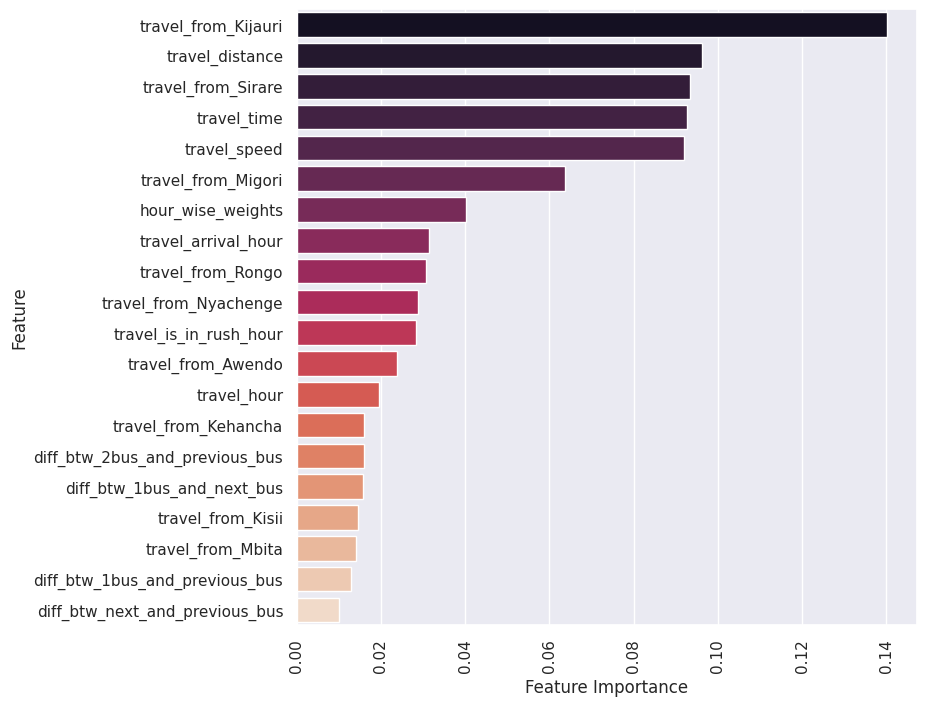

In [ ]:
#plotting the important fetures 
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.barplot(x = 'Feature Importance', y = 'Feature', data=important_features, palette= 'rocket')
sns.set_theme(style='darkgrid')
plt.xticks(rotation=90)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**From EDA we observed that :**

* we see 99% used payment_method is Mpesa, only 1% people use Cash payment.

* Mostly transports are originate from kisii town.

* Both Bus and shuttle are mostly used, but Bus_type used is slightly higher than shuttle_type.

* Maximum capacity of Bus is '49' and maximum capacity of Shuttle is '11'.

* We see some times only single ticket is booked for any individual ride. Most of the variation occur between 1 to 11, which may be due to Shuttle car_type, because the maximum capacity of Shuttle is 11.

* We see maximum number of tickets sell to Sirare followed by Kissi, Migori and Homa Bay.

* We found that average number of ticket sell for Bus is around 10 and for Shuttle is 6.

I have implemented 3 Regression models and achieved a fairly good result for all the algorithms.

* Random Forest Regression.
* Gradient Boost Regression.
* XG Boost Regression.

* XG Boost regression gave a higher testing accuracy of 0.87 than the training accuracy, 0.86. The difference is quite small,it just means that we are likely successful in preventing our model from overfitting on data

* XG Boost Regression performed better than the other two model.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***